In [59]:
using Pkg
Pkg.add("StatsPlots")

   Resolving package versions...
   Installed IntelOpenMP_jll ── v2018.0.3+2
   Installed FFTW ───────────── v1.5.0
   Installed OffsetArrays ───── v1.12.8
   Installed MKL_jll ────────── v2022.2.0+0
   Installed Ratios ─────────── v0.4.3
   Installed StatsPlots ─────── v0.15.4
   Installed AbstractFFTs ───── v1.2.1
   Installed DataValues ─────── v0.4.13
   Installed FFTW_jll ───────── v3.3.10+0
   Installed KernelDensity ──── v0.6.5
   Installed AxisAlgorithms ─── v1.0.1
   Installed Adapt ──────────── v3.4.0
   Installed TableOperations ── v1.2.0
   Installed WoodburyMatrices ─ v0.5.5
   Installed Interpolations ─── v0.14.7
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f3b207a7] + StatsPlots v0.15.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [621f4979] + AbstractFFTs v1.2.1
  [79e6a3ab] + Adapt v3.4.0
  [13072b0f] + AxisAlgorithms v1.0.1
  [e7dc6d0d] + DataValues v0.4.13
  [7a1cc6ca] + FFTW v1.5.0
  [a98d9a8b] + Interpolations v0.14.7
  [5ab0869b] + Kernel

In [1]:
using CSV
using DataFrames
using StatsBase
using MultivariateStats 
using PlotlyJS,MLJ
using Distances
using Clustering

WebIO._IJuliaInit()

In [2]:
# read from csv file
csv_reader = CSV.File("./Data/USArrests.csv")

50-element CSV.File:
 CSV.Row: (Column1 = String15("Alabama"), Murder = 13.2, Assault = 236, UrbanPop = 58, Rape = 21.2)
 CSV.Row: (Column1 = String15("Alaska"), Murder = 10.0, Assault = 263, UrbanPop = 48, Rape = 44.5)
 CSV.Row: (Column1 = String15("Arizona"), Murder = 8.1, Assault = 294, UrbanPop = 80, Rape = 31.0)
 CSV.Row: (Column1 = String15("Arkansas"), Murder = 8.8, Assault = 190, UrbanPop = 50, Rape = 19.5)
 CSV.Row: (Column1 = String15("California"), Murder = 9.0, Assault = 276, UrbanPop = 91, Rape = 40.6)
 CSV.Row: (Column1 = String15("Colorado"), Murder = 7.9, Assault = 204, UrbanPop = 78, Rape = 38.7)
 CSV.Row: (Column1 = String15("Connecticut"), Murder = 3.3, Assault = 110, UrbanPop = 77, Rape = 11.1)
 CSV.Row: (Column1 = String15("Delaware"), Murder = 5.9, Assault = 238, UrbanPop = 72, Rape = 15.8)
 CSV.Row: (Column1 = String15("Florida"), Murder = 15.4, Assault = 335, UrbanPop = 80, Rape = 31.9)
 CSV.Row: (Column1 = String15("Georgia"), Murder = 17.4, Assault = 211, Urba

In [3]:
df = DataFrame(csv_reader)
first(df,5)

Row,Column1,Murder,Assault,UrbanPop,Rape
,String15,Float64,Int64,Int64,Float64
1,Alabama,13.2,236,58,21.2
2,Alaska,10.0,263,48,44.5
3,Arizona,8.1,294,80,31.0
4,Arkansas,8.8,190,50,19.5
5,California,9.0,276,91,40.6


In [4]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Column1,,Alabama,,Wyoming,0,String15
2,Murder,7.788,0.8,7.25,17.4,0,Float64
3,Assault,170.76,45,159.0,337,0,Int64
4,UrbanPop,65.54,32,66.0,91,0,Int64
5,Rape,21.232,7.3,20.1,46.0,0,Float64


In [5]:
newdf = df[!, Not("Column1")]

Row,Murder,Assault,UrbanPop,Rape
,Float64,Int64,Int64,Float64
1,13.2,236,58,21.2
2,10.0,263,48,44.5
3,8.1,294,80,31.0
4,8.8,190,50,19.5
5,9.0,276,91,40.6
6,7.9,204,78,38.7
7,3.3,110,77,11.1
8,5.9,238,72,15.8
9,15.4,335,80,31.9


In [6]:
df1 = Matrix(newdf) #convert dataframe to matrix
dt_std = standardize(ZScoreTransform, df1, dims=1)
dt_std = dt_std' #take transpose because julia fit function needs transpose

4×50 adjoint(::Matrix{Float64}) with eltype Float64:
  1.24256      0.507862  0.0716334  …  -0.479393  -1.19113    -0.226839
  0.782839     1.10682   1.4788        -1.07706   -1.41305    -0.117114
 -0.520907    -1.21176   0.99898       -1.83354    0.0317794  -0.382735
 -0.00341647   2.4842    1.04288       -1.27392   -1.11377    -0.601299

In [7]:
M = fit(PCA,dt_std;maxoutdim=4)

PCA(indim = 4, outdim = 4, principalratio = 1.0)

Pattern matrix (unstandardized loadings):
─────────────────────────────────────────────
        PC1        PC2        PC3         PC4
─────────────────────────────────────────────
1  0.843976  -0.416035   0.20376    0.270371
2  0.918443  -0.187021   0.160119  -0.309592
3  0.438117   0.868328   0.225724   0.0557533
4  0.855839   0.16646   -0.488319   0.0370741
─────────────────────────────────────────────

Importance of components:
──────────────────────────────────────────────────────────────────
                               PC1       PC2        PC3        PC4
──────────────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  2.48024  0.989765  0.356563   0.17343
Variance explained         0.62006  0.247441  0.0891408  0.0433575
Cumulative variance        0.62006  0.867502  0.956642   1.0
Proportion explained       0.62006  0.247441  0.0891408  0.0433575
Cumulative proportion      0.62006  0.867502  0.956642

In [8]:
dt_transformed = MultivariateStats.transform(M, dt_std)
pca_mat = dt_transformed'
pca_mat[:,1] = -pca_mat[:,1]
pca_mat[:,2] = -pca_mat[:,2]
pca_mat

50×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.97566     1.122      -0.439804    0.154697
  1.93054     1.06243     2.0195     -0.434175
  1.74544    -0.73846     0.0542302  -0.826264
 -0.139999    1.10854     0.113422   -0.180974
  2.49861    -1.52743     0.592541   -0.338559
  1.49934    -0.97763     1.084       0.00145016
 -1.34499    -1.07798    -0.636793   -0.117279
  0.0472298  -0.322089   -0.71141    -0.873113
  2.98276     0.0388342  -0.571032   -0.095317
  1.62281     1.26609    -0.339018    1.06597
 -0.903484   -1.55468     0.0502715   0.893733
 -1.62332     0.208853    0.25719    -0.494088
  1.36505    -0.674988   -0.670686   -0.120795
  ⋮                                  
 -0.855091   -1.47698    -1.35618    -0.607403
  1.30745     1.91397    -0.297517   -0.130145
 -1.9678      0.815068    0.385381   -0.108471
  0.989694    0.851605    0.186193    0.646303
  1.34152    -0.408335   -0.487123    0.636731
 -0.545032   -1.45672     0.290776   -0.0814867
 -2.77326     

In [9]:
load = MultivariateStats.loadings(M::PCA)
pca_df = DataFrame(pca_mat[:,1:2], :auto)
pca_df = rename!(pca_df,[:PC1,:PC2])
pca_df = insertcols!(pca_df, 1, :city => df[:,"Column1"])
proj = MultivariateStats.projection(M::PCA)
pca_df

Row,city,PC1,PC2
,String15,Float64,Float64
1,Alabama,0.97566,1.122
2,Alaska,1.93054,1.06243
3,Arizona,1.74544,-0.73846
4,Arkansas,-0.139999,1.10854
5,California,2.49861,-1.52743
6,Colorado,1.49934,-0.97763
7,Connecticut,-1.34499,-1.07798
8,Delaware,0.0472298,-0.322089
9,Florida,2.98276,0.0388342


In [10]:
proj[:,1] = -1 * proj[:,1]
proj[:,2] = -1 * proj[:,2]
proj

4×4 Matrix{Float64}:
 0.535899   0.418181  -0.341233   0.649228
 0.583184   0.187986  -0.268148  -0.743407
 0.278191  -0.872806  -0.378016   0.133878
 0.543432  -0.167319   0.817778   0.0890243

In [11]:
matrx  = [[0.535899,0.583184,0.278191,0.543432] [0.418181,0.187986,-0.872806,-0.167319] [-0.341233,-0.268148,-0.378016,0.817778] [0.649228,-0.743407,0.133878,0.089024]]
matrx' * matrx

4×4 Matrix{Float64}:
  1.0        -6.5611e-8    3.8341e-8   -2.8685e-7
 -6.5611e-8   1.0         -3.91387e-7  -2.22358e-7
  3.8341e-8  -3.91387e-7   1.0         -1.07526e-6
 -2.8685e-7  -2.22358e-7  -1.07526e-6   1.0

In [12]:
features = [:Murder, :Assault, :UrbanPop, :Rape]
plot(pca_df, x=:PC1, y=:PC2, mode="markers",text=:city,
    Layout(
        shapes=[
            line(x0=0, y0=0, x1=proj[1, i], y1=proj[2, i])
            for i in 1:length(features)
        ],
        annotations=[
            attr(
                x=proj[1, i], y=proj[2, i], text=features[i],
                xanchor="center", yanchor="bottom"
            )
            for i in 1:length(features)
        ]
        )) 
#Hover over the dots to see the corresponding city label


data: [
  "scatter with fields mode, text, type, x, xaxis, y, and yaxis"
]

layout: "layout with fields annotations, legend, margin, shapes, template, xaxis, and yaxis"

In [13]:
p = principalvars(M::PCA)

4-element Vector{Float64}:
 2.4802415791494927
 0.9897651525398412
 0.3565631805808296
 0.1734300877298358

In [14]:
# Standard deviation of the four principal components
sqrt.(p)

4-element Vector{Float64}:
 1.5748782743912282
 0.9948694148177645
 0.5971291155025265
 0.41644938195396064

In [15]:
explained_variance_ratio = [[p[1]/sum(p)] [p[2]/sum(p)] [p[3]/sum(p)] [p[4]/sum(p)] ]


1×4 Matrix{Float64}:
 0.62006  0.247441  0.0891408  0.0433575

In [16]:
plot_df = DataFrame(
    x=[1,2,3,4],
    y=[explained_variance_ratio[1], explained_variance_ratio[2], explained_variance_ratio[3], explained_variance_ratio[4]]
, )
PlotlyJS.plot(plot_df, x=:x, y=:y, Layout(title="Indivdual component of variation explained by Principal Compoenents"))

data: [
  "scatter with fields type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, title, xaxis, and yaxis"

### Lab 3: NCI60 Data Example
##### 10.6.1 PCA

In [17]:
# There is one file for the features and another file for the classes/types
csv_reader_lab3_x = CSV.File("./Data/NCI60_X.csv")
println(typeof(csv_reader_lab3_x));
df3_temp = DataFrame(csv_reader_lab3_x)
first(df3_temp,5)

CSV.File


Row,Column1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,⋯
,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,V1,0.3,1.18,0.55,1.14,-0.265,-0.07,0.35,-0.315,-0.45,-0.65498,-0.65,-0.94,0.31,0.0150098,-0.08,-2.37,-0.54,-0.615,0.0,-0.51999,-0.37,-0.29,-0.17499,0.07,-0.04,0.025,-0.74,-0.47999,-0.45,-0.93,0.16,-0.55,-0.55001,0.055,-0.37,-0.165,0.21,0.47,0.0,-2.60208e-18,0.139981,-0.215,-0.065,-0.225,-0.35,-1.335,0.0,0.2175,0.25,0.13,-0.48,-0.42,-0.7,-0.275,-0.34499,-0.16,-0.35,0.555,0.29,-0.27,-0.339981,0.305,-0.005,0.7,0.45002,0.21,0.29,0.0849902,-0.45501,0.12,-0.66,0.1,0.1,-0.099961,-0.399981,-0.195,0.28,2.36,0.47,0.18,-0.64499,1.3,0.0,-0.48,0.595,-0.0599805,0.055,0.0975,0.4,0.28,0.76,1.425,-0.51,0.94,0.94,0.68,-0.21,-1.19,0.0,⋯
2,V2,0.679961,1.28996,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.040039,-0.285019,-0.310039,-0.720039,-0.010039,0.0,-0.570039,0.0,-0.470039,-0.355039,0.00498051,-0.480029,-0.140039,-0.090039,0.00497074,-0.220039,-0.370039,0.0,-0.320039,0.159971,0.179961,-0.320039,-0.440039,0.349961,0.449951,0.104961,0.489961,0.204961,-0.050039,-0.010039,0.269961,0.019961,0.0499415,-0.315039,-0.325039,-0.055039,-0.280039,-0.255039,0.229961,-0.342539,-0.560039,-0.900039,-0.060039,-0.200039,-0.670039,0.324961,0.134971,0.539961,0.229961,0.084961,-0.080039,0.949961,0.93998,0.194961,1.90496,0.499961,0.349981,0.899961,1.21996,0.0,0.374951,0.279961,-3.89862e-5,-0.090039,-0.050039,0.0,0.90998,0.274961,-0.040039,0.869961,-0.100039,1.40996,1.00497,0.779961,-0.110039,-0.350039,-0.215039,-0.0600195,0.324961,0.267461,0.129961,0.229961,0.079961,0.514961,-0.420039,-0.350039,-0.790039,-0.290039,-0.010039,-1.05004,-2.04004,⋯
3,V3,0.94,-0.04,-0.17,-0.04,-0.605,0.0,0.09,0.645,0.43,0.475019,0.41,0.13,-0.35,0.0,0.0,0.0,-0.8,0.0,-0.00498051,0.0,-0.14,0.05,-0.0649903,-0.06,0.29,0.715,-0.07,-0.0899903,-0.31,0.58,-0.48,0.23,-0.0400098,-0.935,-0.75,-0.385,-0.34,0.12,-0.47,0.17,-0.86002,-0.175,-0.715,-0.965,-0.54,-0.005,-0.06,-0.7225,-0.92,0.47,0.7,0.67,-0.9,-0.265,-0.42499,-0.24,-0.03,0.215,0.29,0.07,0.12002,0.515,0.545,-0.03,0.19002,-0.07,0.4,0.0,-0.0950098,0.27,0.08,0.0,0.0,-0.319961,0.0900195,0.105,-0.28,1.99,0.0,0.87,0.0,0.74,0.0,-1.2,-0.335,0.630019,0.345,0.6975,0.27,-0.02,0.0,-0.115,-0.44,0.54,0.49,0.64,0.66,0.0,0.0,⋯
4,V4,0.28,-0.31,0.68,-0.81,0.625,-1.38778e-17,0.17,0.245,0.02,0.0950195,-0.01,-0.12,-0.21,0.0,0.61,-1.02,-0.47,0.0,-0.76498,0.0,-0.31,-0.62,-0.28499,-0.54,-0.52,-0.135,-0.89,-0.26999,-0.84,-0.23,0.32,0.0,0.10999,0.455,-0.34,-0.895,-1.08,-0.43,-0.03,-0.13,-0.540019,-1.225,-1.265,-1.415,-0.27,-0.705,-0.22,-0.5025,-0.04,-0.15,-0.16,-0.29,-0.18,-0.665,-0.77499,0.21,-0.77,-0.605,-0.19,0.17,-0.20998,-0.615,0.165,-0.19,0.0,-0.06,-0.01,-0.50501,-0.77501,-0.29,-0.71,-0.45,-0.61,-0.809961,-1.53998,-1.035,0.0,3.6,0.0,0.85,-0.19499,-1.21,1.02,0.66,0.775,-0.279981,-0.245,-0.5025,-0.8,-0.75,0.06,-1.075,0.54,0.16,0.0,0.23,-0.74,0.0,-2.5,⋯
5,V5,0.485,-0.465,0.395,0.905,0.2,-0.005,0.085,0.11,0.235,1.49002,0.685,0.605,0.355,1.22001,2.425,0.0,-0.315,0.31,-

In [18]:
# standardize datafram
newdf3 = df3_temp[!, Not("Column1")]
df3_temp_mat = Matrix(newdf3) #convert dataframe to matrix
dt_std3 = standardize(ZScoreTransform, df3_temp_mat, dims=1)
df3 = DataFrame(dt_std3[:,:], :auto)
df3 = insertcols!(df3, 1, :Column1 => df3_temp[:,"Column1"])
first(df3,5)

Row,Column1,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,String3,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,V1,0.722955,1.59461,1.31529,1.34506,-0.600101,-0.218923,0.891093,-0.861928,-1.05031,-1.05087,-1.12309,-1.40447,0.8138,0.0484224,-0.318195,-1.20896,-0.779486,-1.0159,-0.0430071,-1.1453,-0.887642,-1.01535,-0.628895,0.252355,-0.143908,0.00796696,-1.1453,-0.602472,-1.08536,-1.65508,0.114376,-1.39545,-0.942353,0.00615987,-0.5445,-0.310102,0.599185,1.241,0.196218,-0.00553447,0.394593,-0.490895,-0.174963,-0.45011,-0.736363,-2.86076,-0.00730074,0.226403,0.359428,0.27091,-0.771044,-0.771035,-1.25273,-0.78352,-0.747262,-0.406822,-0.792269,1.50034,0.600187,-0.384149,-0.616774,1.05472,0.0416638,1.70583,1.19446,0.415721,0.462051,0.311206,-0.59266,0.345646,-1.40903,0.286575,0.275563,-0.15391,-0.706792,-0.360738,0.706164,1.23248,1.88179,0.218978,-0.846614,1.17377,-0.0711048,-0.422798,0.633741,-0.0772158,0.136081,0.363253,0.656434,0.27288,1.11122,1.15597,-0.597162,1.01236,0.804738,1.17723,-0.543646,-1.67655,-0.0164562,⋯
2,V2,1.5839,1.73979,0.438221,0.648988,0.904746,1.63582,1.83519,2.20916,-0.0951082,-0.474228,-0.611667,-1.10791,0.105402,0.0187043,-0.81052,-0.345389,-0.71724,-0.534425,-0.0338137,-1.04991,-0.342176,-0.3724,-0.0351789,-0.812254,-0.919353,-0.0486821,-0.514117,0.291903,0.315829,-0.448991,-0.831215,0.72134,0.814882,0.0790931,0.757325,0.334541,0.0170543,-0.128488,0.799981,0.0316891,0.181488,-0.692367,-0.577153,-0.166607,-0.583508,-0.454569,0.606897,-0.634127,-1.04054,-1.24,-0.162416,-0.416552,-1.20611,0.645031,0.279307,1.28222,0.458566,0.331673,-0.192777,2.15553,1.68504,0.728652,2.98543,1.2109,0.924085,1.67048,1.77564,0.148204,0.664055,0.660742,0.0829228,-0.216737,-0.0574849,0.0482787,2.11223,0.917257,0.047513,0.376329,-0.347542,1.18196,1.29729,0.7273,-0.206812,-0.303306,-0.3055,-0.0772958,0.563947,0.653787,0.194513,0.197415,0.129927,0.288527,-0.479376,-0.274421,-0.421725,-0.460167,0.00525606,-1.49315,-1.74924,⋯
3,V3,2.17311,-0.0160897,-0.346354,0.264375,-1.30103,-0.0191701,0.189686,1.97303,1.00007,0.710403,0.471519,0.0381307,-0.647093,0.0187043,-0.237822,-0.345389,-1.01082,0.123137,-0.0522005,0.0960309,-0.342084,0.0778748,-0.26599,-0.224819,0.631445,1.57148,-0.138318,-0.0574291,-0.773968,1.33068,-0.894189,0.439181,-0.0461281,-1.43904,-1.11975,-0.693444,-0.63206,0.242496,-0.854927,0.311484,-1.97222,-0.410337,-1.18029,-1.68446,-1.15149,0.102526,-0.167553,-1.21796,-1.66265,0.769638,0.939069,0.985578,-1.56391,-0.759709,-0.918371,-0.599866,-0.102106,0.654991,0.600187,0.323652,0.210464,1.67699,0.889362,-0.100318,0.491764,-0.0934868,0.617428,0.148204,-0.0475535,0.64112,0.263864,0.0217281,0.0535886,-0.598897,0.347683,0.455071,-0.446335,1.01988,0.043695,0.759203,-0.00853628,0.692992,-0.0711048,-1.08479,-0.444595,1.33771,0.595707,1.3889,0.434059,-0.179562,0.0145436,-0.311946,-0.505511,0.613368,0.485723,1.10971,1.84454,-0.117215,-0.0164562,⋯
4,V4,0.677638,-0.

In [19]:
csv_reader_lab3_y = CSV.File("./Data/NCI60_y.csv")
println(typeof(csv_reader_lab3_y));
df3_y = DataFrame(csv_reader_lab3_y)
df3_y = df3_y[!, Not("Column1")]
combine(nrow,groupby(df3_y,:x))

CSV.File


Row,x,nrow
,String15,Int64
1,CNS,5
2,RENAL,9
3,BREAST,7
4,NSCLC,9
5,UNKNOWN,1
6,OVARIAN,6
7,MELANOMA,8
8,PROSTATE,2
9,LEUKEMIA,6


In [20]:
dt_std3 = dt_std3'
M3 = fit(PCA,dt_std3;maxoutdim=6830)
dt_transformed3 = MultivariateStats.transform(M3, dt_std3)
pca_mat3 = dt_transformed3'

64×60 adjoint(::Matrix{Float64}) with eltype Float64:
 -19.6824      3.52775   -9.73544   …   9.0067     -3.86203     3.21537
 -22.9081      6.39094  -13.3725       -7.60547     3.90791    -3.98678
 -27.2408      2.44581   -3.50534      -0.0446248   2.01193     1.08127
 -42.481      -9.69174   -0.883092      6.33994    -3.40267     0.700202
 -54.9839     -5.15812  -20.9291       -1.85565     2.27768    -0.60956
 -26.9649      6.72712  -21.6423    …  -2.92109     1.95763     0.136023
 -31.1993      3.83376  -30.1165       -3.04889    -0.749343   -0.200938
 -22.1572     10.3149   -18.61          2.26542     1.09468    -0.360548
 -14.1778     15.9831   -19.6025        0.82574     2.86069     1.15218
 -29.5148     23.805     -5.83971       0.270472    2.77853    -0.0916602
 -30.5058      9.80446    7.92032   …  -2.35452    -0.24965     0.786951
 -34.1444      9.66801   -6.70945      -3.53148    -4.03298    -1.50764
 -16.9027     14.8327    -9.7081        3.37962     1.428       0.516624
  

In [21]:
df3_pca = DataFrame(pca_mat3[:,1:5], :auto)
df3_pca = insertcols!(df3_pca, 1, :y => df3_y[:,"x"])
first(df3_pca,10)

Row,y,x1,x2,x3,x4,x5
,String15,Float64,Float64,Float64,Float64,Float64
1,CNS,-19.6824,3.52775,-9.73544,-0.817782,12.5111
2,CNS,-22.9081,6.39094,-13.3725,5.59111,7.97247
3,CNS,-27.2408,2.44581,-3.50534,-1.33115,12.4663
4,RENAL,-42.481,-9.69174,-0.883092,3.41802,41.9384
5,BREAST,-54.9839,-5.15812,-20.9291,15.7254,10.3614
6,CNS,-26.9649,6.72712,-21.6423,13.7323,-7.93483
7,CNS,-31.1993,3.83376,-30.1165,41.3381,-10.3438
8,BREAST,-22.1572,10.3149,-18.61,6.89723,5.48486
9,NSCLC,-14.1778,15.9831,-19.6025,6.51409,3.77311


In [22]:
PlotlyJS.plot(
    df3_pca, x=:x1, y=:x2, color=:y,
    mode="markers",
    Layout(yaxis_title="Principal Component 2", xaxis_title="Principal Component 1")
)

data: [
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, xaxis, and yaxis"

In [23]:
PlotlyJS.plot(
    df3_pca, x=:x1, y=:x3, color=:y,
    mode="markers",
    Layout(yaxis_title="Principal Component 3", xaxis_title="Principal Component 1")
)

data: [
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis",
  "scatter with fields legendgroup, marker, mode, name, showlegend, type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, xaxis, and yaxis"

In [24]:
var3 = principalvars(M3::PCA)
std_dev3 = sqrt.(principalvars(M3::PCA))[1:60]
prop_std_dev3 = [var3[i]/tprincipalvar(M3::PCA) for i in 1:60]
cumulative_prop_std_dev3 = [prop_std_dev3[1]]
for i in 2:60
    push!(cumulative_prop_std_dev3, cumulative_prop_std_dev3[i-1]+prop_std_dev3[i]) 
end

pca_info_mat = [std_dev3,prop_std_dev3,cumulative_prop_std_dev3]
#convert array of arrays to a 3x60 matrix
pca_info_mat = reduce(hcat,pca_info_mat)'  


3×60 adjoint(::Matrix{Float64}) with eltype Float64:
 27.8535    21.4814     19.8205     …  5.29215     5.02117     4.68398
  0.114434   0.0680646   0.0579463     0.00413106  0.00371885  0.00323614
  0.114434   0.182499    0.240445      0.993045    0.996764    1.0

In [25]:
pca_info = DataFrame(pca_info_mat[:,1:5], :auto)
pca_info = rename!(pca_info,:x1 => :PC1, :x2 => :PC2, :x3 => :PC3, :x4 => :PC4, :x5 => :PC5 )
pca_info = insertcols!(pca_info, 1,:Info => ["Standard Deviation","Proportion of Variance", "Cumulative Proportion"])

Row,Info,PC1,PC2,PC3,PC4,PC5
,String,Float64,Float64,Float64,Float64,Float64
1,Standard Deviation,27.8535,21.4814,19.8205,17.0326,15.9718
2,Proportion of Variance,0.114434,0.0680646,0.0579463,0.0427915,0.0376276
3,Cumulative Proportion,0.114434,0.182499,0.240445,0.283237,0.320864


In [26]:
using PlotlyJS
x_plot = [i for i in 1:10]
y_plot = [var3[i] for i in 1:10]
plot(bar(x=x_plot, y=y_plot))

data: [
  "bar with fields type, x, and y"
]

layout: "layout with fields margin and template"

In [27]:
x_plot_new = [i for i in 1:60]
plot([scatter(
    x = x_plot_new,
    y = pca_info_mat[2,:],
    mode = "lines+markers",),
   ],
    Layout(yaxis_title="Proportion of Variance Explained", xaxis_title="Principal Component")
)

data: [
  "scatter with fields mode, type, x, and y"
]

layout: "layout with fields margin, template, xaxis, and yaxis"

In [28]:
plot(scatter(
    x = x_plot_new,
    y = pca_info_mat[3,:],
    mode = "lines+markers"
    ),
    Layout(yaxis_title="Cumulative Proportion of Variance Explained", xaxis_title="Principal Component")
) 



data: [
  "scatter with fields mode, type, x, and y"
]

layout: "layout with fields margin, template, xaxis, and yaxis"

#### 10.6.2 Clustering

5 : BREAST, 8 : BREAST, 6 : CNS, 7 : CNS, 20 : RENAL, 18 : BREAST, 19 : NSCLC, 4 : RENAL, 59 : MELANOMA, 25 : OVARIAN, 26 : OVARIAN, 53 : NSCLC, 27 : OVARIAN, 42 : COLON, 44 : COLON, 29 : OVARIAN, 30 : PROSTATE, 54 : NSCLC, 32 : NSCLC, 33 : NSCLC, 24 : PROSTATE, 9 : NSCLC, 23 : MELANOMA, 17 : RENAL, 15 : RENAL, 16 : RENAL, 28 : OVARIAN, 21 : UNKNOWN, 22 : OVARIAN, 10 : NSCLC, 3 : CNS, 1 : CNS, 2 : CNS, 31 : NSCLC, 12 : RENAL, 13 : RENAL, 11 : RENAL, 14 : RENAL, 55 : NSCLC, 62 : MELANOMA, 64 : MELANOMA, 63 : MELANOMA, 60 : MELANOMA, 61 : MELANOMA, 56 : MELANOMA, 57 : BREAST, 58 : BREAST, 47 : COLON, 45 : COLON, 46 : COLON, 43 : COLON, 48 : COLON, 52 : BREAST, 49 : MCF7A-repro, 50 : BREAST, 51 : MCF7D-repro, 39 : LEUKEMIA, 40 : LEUKEMIA, 41 : LEUKEMIA, 37 : LEUKEMIA, 35 : K562B-repro, 36 : K562A-repro, 34 : LEUKEMIA, 38 : LEUKEMIA, 

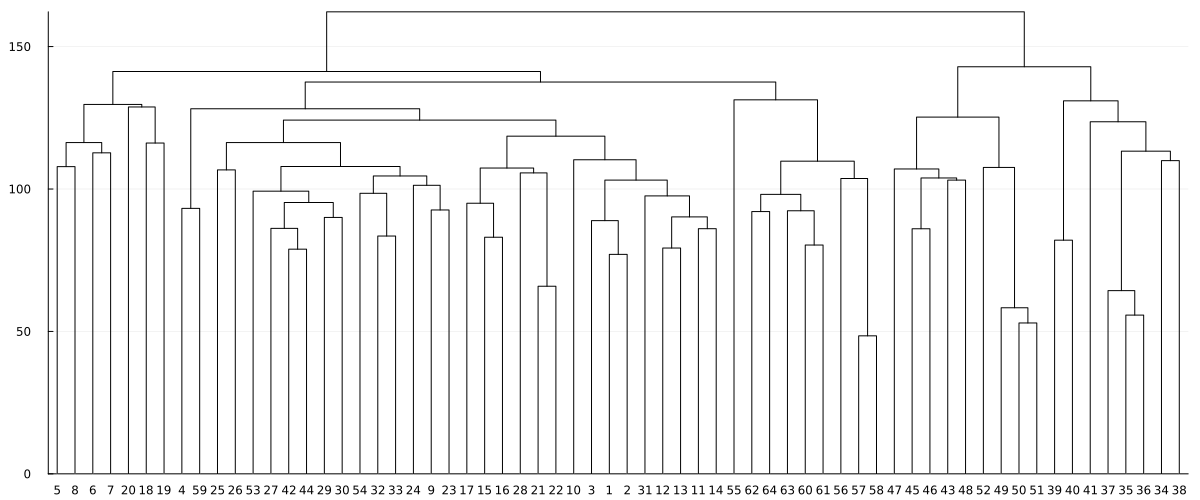

In [30]:
#Plotting Complete Linkage Dendogram
using StatsPlots
euc_dist = pairwise(Euclidean(), dt_std3, dt_std3)
hc_complete = hclust(euc_dist::AbstractMatrix; linkage=:complete) 
StatsPlots.gr(size = (1200, 500));
for i in 1:64 
    print(hc_complete.order[i], " : ", df3_y.x[hc_complete.order[i]], ", ")
end
StatsPlots.plot(hc_complete)


41 : LEUKEMIA, 39 : LEUKEMIA, 40 : LEUKEMIA, 34 : LEUKEMIA, 38 : LEUKEMIA, 37 : LEUKEMIA, 35 : K562B-repro, 36 : K562A-repro, 20 : RENAL, 55 : NSCLC, 18 : BREAST, 19 : NSCLC, 52 : BREAST, 49 : MCF7A-repro, 50 : BREAST, 51 : MCF7D-repro, 47 : COLON, 43 : COLON, 48 : COLON, 4 : RENAL, 59 : MELANOMA, 56 : MELANOMA, 57 : BREAST, 58 : BREAST, 63 : MELANOMA, 64 : MELANOMA, 62 : MELANOMA, 60 : MELANOMA, 61 : MELANOMA, 25 : OVARIAN, 26 : OVARIAN, 10 : NSCLC, 28 : OVARIAN, 21 : UNKNOWN, 22 : OVARIAN, 9 : NSCLC, 23 : MELANOMA, 3 : CNS, 1 : CNS, 2 : CNS, 11 : RENAL, 14 : RENAL, 15 : RENAL, 16 : RENAL, 17 : RENAL, 12 : RENAL, 13 : RENAL, 24 : PROSTATE, 54 : NSCLC, 31 : NSCLC, 32 : NSCLC, 33 : NSCLC, 29 : OVARIAN, 30 : PROSTATE, 53 : NSCLC, 45 : COLON, 46 : COLON, 27 : OVARIAN, 42 : COLON, 44 : COLON, 7 : CNS, 6 : CNS, 5 : BREAST, 8 : BREAST, 

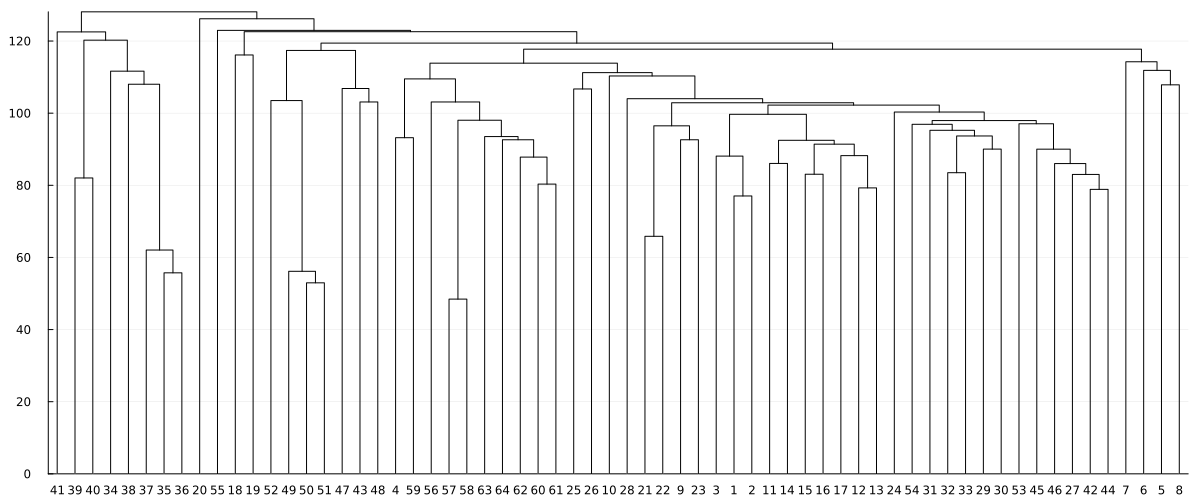

In [31]:
#Plotting Average Linkage Dendogram
hc_avg = hclust(euc_dist::AbstractMatrix; linkage=:average) 
StatsPlots.gr(size = (1200, 500));
for i in 1:64 
    print(hc_avg.order[i], " : ", df3_y.x[hc_avg.order[i]], ", ")
end
StatsPlots.plot(hc_avg)

41 : LEUKEMIA, 20 : RENAL, 18 : BREAST, 39 : LEUKEMIA, 40 : LEUKEMIA, 7 : CNS, 38 : LEUKEMIA, 37 : LEUKEMIA, 35 : K562B-repro, 36 : K562A-repro, 55 : NSCLC, 34 : LEUKEMIA, 25 : OVARIAN, 19 : NSCLC, 6 : CNS, 5 : BREAST, 10 : NSCLC, 26 : OVARIAN, 47 : COLON, 52 : BREAST, 56 : MELANOMA, 4 : RENAL, 64 : MELANOMA, 57 : BREAST, 58 : BREAST, 59 : MELANOMA, 63 : MELANOMA, 62 : MELANOMA, 60 : MELANOMA, 61 : MELANOMA, 8 : BREAST, 28 : OVARIAN, 48 : COLON, 49 : MCF7A-repro, 50 : BREAST, 51 : MCF7D-repro, 21 : UNKNOWN, 22 : OVARIAN, 54 : NSCLC, 53 : NSCLC, 24 : PROSTATE, 23 : MELANOMA, 43 : COLON, 29 : OVARIAN, 31 : NSCLC, 11 : RENAL, 45 : COLON, 30 : PROSTATE, 46 : COLON, 27 : OVARIAN, 42 : COLON, 44 : COLON, 32 : NSCLC, 33 : NSCLC, 14 : RENAL, 9 : NSCLC, 17 : RENAL, 12 : RENAL, 13 : RENAL, 15 : RENAL, 16 : RENAL, 3 : CNS, 1 : CNS, 2 : CNS, 

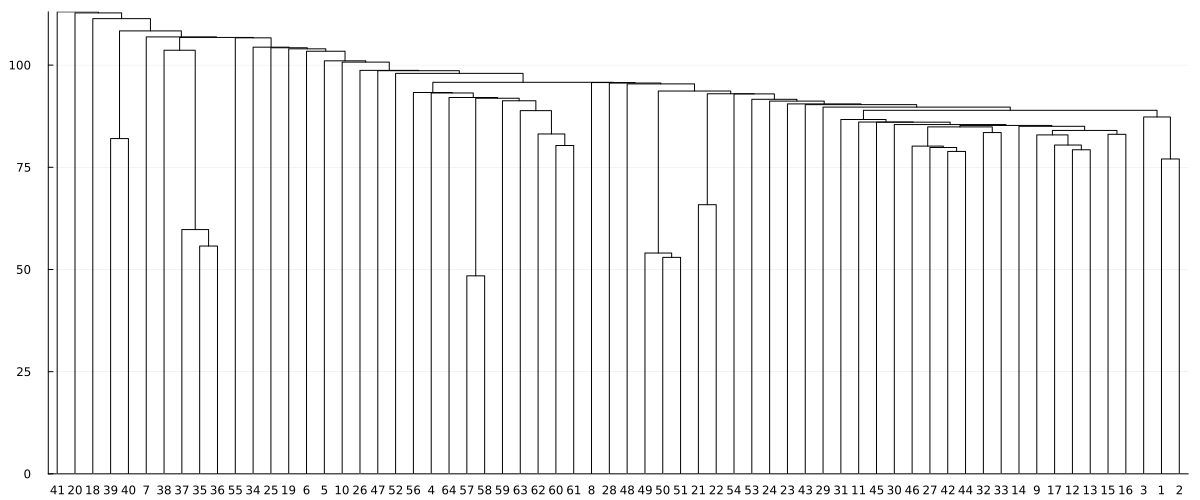

In [32]:
#Plotting Single Linkage Dendogram
hc_single = hclust(euc_dist::AbstractMatrix; linkage=:single) 
StatsPlots.gr(size = (1200, 500));
for i in 1:64 
    print(hc_single.order[i], " : ", df3_y.x[hc_single.order[i]], ", ")
end
StatsPlots.plot(hc_single)

In [35]:
cutree(hc_complete::Hclust; k=4)

64-element Vector{Int64}:
 1
 1
 1
 1
 2
 2
 2
 2
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

#### KMeans